In [2]:
# use hist files from flash and BBmerge output to create histogram bar plot
# I ran this in shell to direct python to look for pkgs etc: export PATH="/Users/ZXue/miniconda3/bin:$PATH"

In [148]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# import modules to manipulate directory and files
import os
import glob # for unix like file path

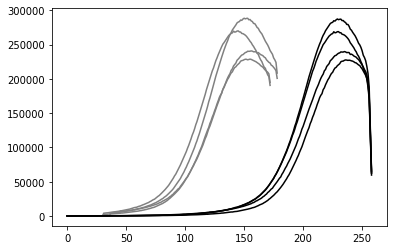

In [212]:
## for all flash output
file_path = "/Volumes/GoogleDrive/My Drive/Lemay_lab/Method_dev/preproc/step2-4_trim_fastuniq_flash/step4_flash/"
infiles = glob.glob(os.path.join(file_path, "*..hist"))

# create empty dictionary to store the files
file_array = {}

# append data to the array/dist
for file in infiles: 
    id =  file[-10:-6] # sample name as key
    hist = pd.read_csv(file, sep="\t", header=None) # value
    file_array[id] = hist
    file_array[id].columns = ['read_length','flash'] 

# create read length distrubtion for multiple dfs
# subplot help page: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplot.html
fig = plt.subplot() 
for key in file_array:
    fig.plot(file_array[key]["flash"], color="grey") 
    
    
    

## for all bbmerge output
file_path_bb = "/Volumes/GoogleDrive/My Drive/Lemay_lab/Method_dev/preproc/step2-4_trim_fastuniq_bbmerge/step4_bbmerge"
infiles_bb = glob.glob(os.path.join(file_path_bb, "*..hist"))

for file in infiles_bb: 
    id =  file[-10:-6] # key # a little bit different for keys
    hist = pd.read_csv(file, sep="\t", header=None, comment='#') # value ## ignore lines with #
    file_array[id] = hist
    
    file_array[id].columns = ['read_length','bbmerge'] 
    fig.plot(file_array[id]["bbmerge"], color="black") # another method to make the figure

    

    


## This method of plotting does not work because it automatically have x axis (x=x+1)
## I need to find a way to specify x axis


In [264]:
######## plot method 2 plot per sample

## for all flash output
file_path = "/Volumes/GoogleDrive/My Drive/Lemay_lab/Method_dev/preproc/step2-4_trim_fastuniq_flash/step4_flash/"
infiles = glob.glob(os.path.join(file_path, "*..hist"))

# create empty dictionary to store the files
file_array = {}

# append data to the array/dist
for file in infiles: 
    id =  file[-10:-6] # sample name as key
    hist = pd.read_csv(file, sep="\t", header=None) # value
    hist['method'] = "flash" # add a column named 'method'
    file_array[id] = hist
    file_array[id].columns = ['read_length','count', 'method'] 

    
## for all bbmerge sample
file_path_bb = "/Volumes/GoogleDrive/My Drive/Lemay_lab/Method_dev/preproc/step2-4_trim_fastuniq_bbmerge/step4_bbmerge"
infiles_bb = glob.glob(os.path.join(file_path_bb, "*..hist"))

# create empty dictionary to store the files
file_array_bb = {}

# append data to the array/dist
for file in infiles_bb: 
    id =  file[-10:-6] # sample name as key
    hist = pd.read_csv(file, sep="\t", header=None, comment='#') # value
    hist['method'] = "bbmerge"
    file_array_bb[id] = hist
    file_array_bb[id].columns = ['read_length','count', 'method'] 
    


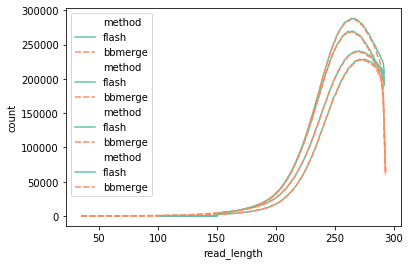

In [267]:
## make plot per sample    
## cat flash and bb df together 
# 5002 
df_5002 = file_array['5002'].append(file_array_bb['5002'], ignore_index=True) # ignore row name
# 5005
df_5005 = file_array['5005'].append(file_array_bb['5005'], ignore_index=True) # ignore row name
# 5006
df_5006 = file_array['5006'].append(file_array_bb['5006'], ignore_index=True) # ignore row name
# 5007
df_5007 = file_array['5007'].append(file_array_bb['5007'], ignore_index=True) # ignore row name
# combine into a list
df_array = {'5002':df_5002, '5005':df_5005, '5006':df_5006, '5007':df_5007}

for key in df_array:
    sns.set_palette(sns.color_palette("Set2")) # define color for making figs
    plot = sns.lineplot(x="read_length", y="count", hue="method", style='method',
                        data=df_array[key])
    fig = plot.get_figure() 
    # save each fig with increasing number of samples 
    # (samples are plotted on the same fig repeatedly)
    fig.savefig("/Volumes/GoogleDrive/My Drive/Lemay_lab/Method_dev/preproc/merger_comp%s.pdf" % key,
            format='pdf') # need s after % for string. d for digits  

# save the fig with all four samples   
fig.savefig("/Volumes/GoogleDrive/My Drive/Lemay_lab/Method_dev/preproc/merger_comp.pdf",
            format='pdf') 
 

ValueError: unsupported format character 'p' (0x70) at index 72